In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import datset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train['data'] = 'train'
test['data'] = 'test'

In [4]:
all_data = pd.concat([train, test], axis=0)

In [5]:
all_data.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140              0.0    0   
1                    1759         29.1              200              0.0    0   
2                    1805         26.5               25              0.0    0   
3                    1524         44.3              197              0.0    0   
4                    1641         35.4               34              0.0    0   

   HDF  PWF  OSF  RNF   data  
0    0    0    0    0  train  
1    0    0    0    0  train  
2    0    0    0    0  train  
3    0    0    0    0  train  
4    0    0    0    0  train

In [6]:
all_data.shape

(227383, 15)

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227383 entries, 0 to 90953
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       227383 non-null  int64  
 1   Product ID               227383 non-null  object 
 2   Type                     227383 non-null  object 
 3   Air temperature [K]      227383 non-null  float64
 4   Process temperature [K]  227383 non-null  float64
 5   Rotational speed [rpm]   227383 non-null  int64  
 6   Torque [Nm]              227383 non-null  float64
 7   Tool wear [min]          227383 non-null  int64  
 8   Machine failure          136429 non-null  float64
 9   TWF                      227383 non-null  int64  
 10  HDF                      227383 non-null  int64  
 11  PWF                      227383 non-null  int64  
 12  OSF                      227383 non-null  int64  
 13  RNF                      227383 non-null  int64  
 14  data 

In [8]:
all_data.describe()

id  Air temperature [K]  Process temperature [K]  \
count  227383.000000        227383.000000            227383.000000   
mean   113691.000000           299.861463               309.940392   
std     65639.962467             1.860371                 1.385219   
min         0.000000           295.300000               305.700000   
25%     56845.500000           298.300000               308.700000   
50%    113691.000000           300.000000               310.000000   
75%    170536.500000           301.200000               310.900000   
max    227382.000000           304.400000               313.800000   

       Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  \
count           227383.000000  227383.000000    227383.000000   
mean              1520.409938      40.343262       104.362925   
std                139.231189       8.503195        63.927361   
min               1168.000000       3.800000         0.000000   
25%               1432.000000      34.600000        48.000000   
50%               1493.000000      40.500000       106.000000   
75%               1579.000000      46.100000       159.000000   
max               2886.000000      76.600000       253.000000   

       Machine failure            TWF            HDF            PWF  \
count    136429.000000  227383.000000  227383.000000  227383.000000   
mean          0.015744       0.001522       0.005233       0.002379   
std           0.124486       0.038979       0.072153       0.048720   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       0.000000   
50%           0.000000       0.000000       0.000000       0.000000   
75%           0.000000       0.000000       0.000000       0.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 OSF            RNF  
count  227383.000000  227383.000000  
mean        0.003923       0.002278  
std         0.062510       0.047675  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

# 1. Duplicate check

In [9]:
dups = all_data.duplicated()
print("Number of duplicated rows = %d" %(dups.sum()))
all_data[dups]

Number of duplicated rows = 0


Empty DataFrame
Columns: [id, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF, data]
Index: []

# 2.Handling missing value

In [10]:
all_data.isnull().sum() / len(all_data)*100

id                          0.000000
Product ID                  0.000000
Type                        0.000000
Air temperature [K]         0.000000
Process temperature [K]     0.000000
Rotational speed [rpm]      0.000000
Torque [Nm]                 0.000000
Tool wear [min]             0.000000
Machine failure            40.000352
TWF                         0.000000
HDF                         0.000000
PWF                         0.000000
OSF                         0.000000
RNF                         0.000000
data                        0.000000
dtype: float64

In [11]:
dataset = all_data.drop(['id','Product ID'], axis=1)

In [12]:
dataset.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    L                300.6                    309.6                    1596   
1    M                302.6                    312.1                    1759   
2    L                299.3                    308.5                    1805   
3    L                301.0                    310.9                    1524   
4    M                298.0                    309.0                    1641   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0         36.1              140              0.0    0    0    0    0    0   
1         29.1              200              0.0    0    0    0    0    0   
2         26.5               25              0.0    0    0    0    0    0   
3         44.3              197              0.0    0    0    0    0    0   
4         35.4               34              0.0    0    0    0    0    0   

    data  
0  train  
1  train  
2  train  
3  train  
4  train

In [13]:
dataset['Type'].value_counts()

L    158792
M     53687
H     14904
Name: Type, dtype: int64

In [14]:
dataset['Machine failure'].value_counts()

0.0    134281
1.0      2148
Name: Machine failure, dtype: int64

<AxesSubplot: ylabel='Air temperature [K]'>

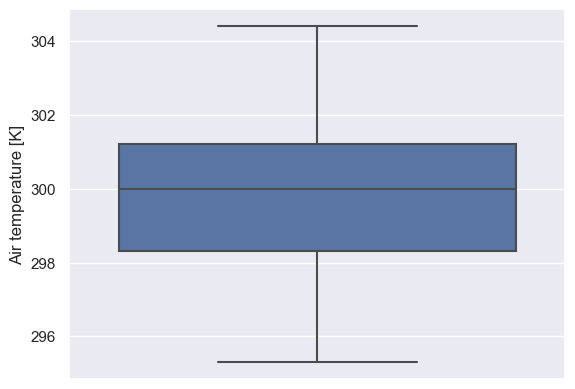

In [15]:
sns.boxplot(y='Air temperature [K]', data=all_data)

<AxesSubplot: ylabel='Process temperature [K]'>

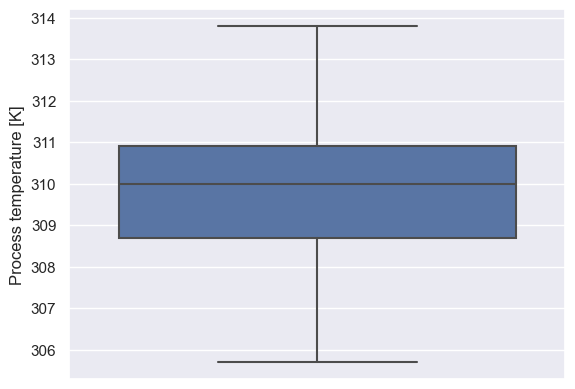

In [16]:
sns.boxplot(y='Process temperature [K]', data=all_data)

<AxesSubplot: ylabel='Rotational speed [rpm]'>

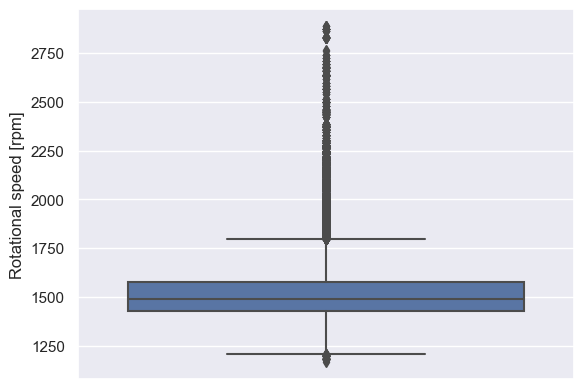

In [17]:
sns.boxplot(y='Rotational speed [rpm]', data=all_data)

<AxesSubplot: ylabel='Torque [Nm]'>

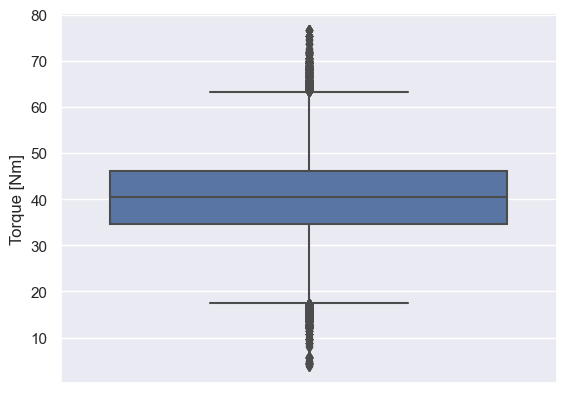

In [18]:
sns.boxplot(y='Torque [Nm]', data=all_data)

<AxesSubplot: ylabel='Tool wear [min]'>

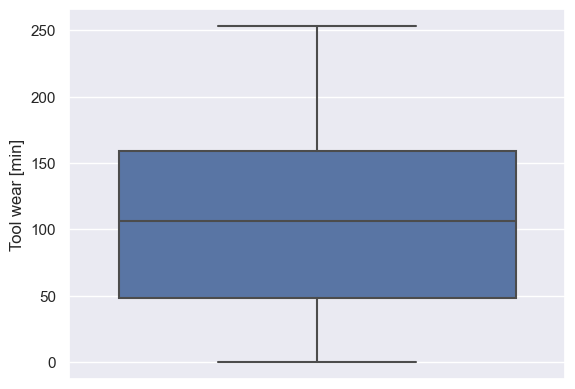

In [19]:
sns.boxplot(y='Tool wear [min]', data=all_data)

# 2. outlier - No outlier

In [20]:
for i in dataset.columns:
    print("****************************************************", i , 
          "*****************************************************************")
    print()
    print(set(dataset[i].tolist()))
    print()

**************************************************** Type *****************************************************************

{'L', 'H', 'M'}

**************************************************** Air temperature [K] *****************************************************************

{296.6, 296.4, 302.8, 297.4, 298.9, 304.3, 299.9, 303.4, 304.4, 301.2, 296.5, 296.0, 295.5, 296.7, 297.7, 298.6, 299.4, 298.0, 301.1, 302.9, 301.6, 300.4, 300.9, 299.3, 300.6, 301.0, 302.6, 301.5, 303.5, 304.2, 304.1, 302.2, 297.095, 303.2, 303.96, 299.5, 304.0, 300.0, 300.98, 295.3, 300.3, 302.0, 297.8, 303.0, 295.6, 295.7, 295.9, 295.8, 295.4, 296.9, 296.1, 296.8, 296.2, 296.3, 297.3, 297.9, 297.5, 297.0, 297.6, 298.4, 298.8, 298.2, 297.1, 297.2, 299.6, 298.7, 298.5, 298.3, 298.1, 300.5, 299.2, 299.7, 299.1, 299.0, 301.4, 299.8, 300.2, 300.1, 300.7, 302.7, 301.3, 301.8, 301.9, 301.7, 303.8, 302.5, 302.4, 302.3, 302.1, 303.9, 303.7, 303.3, 303.6, 303.1, 300.8}

***********************************************

{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

# 3. Encoding part

In [21]:
dummies = pd.get_dummies(dataset[['Type']],
                        columns = ['Type'], 
                        prefix = ['Type'],
                        drop_first=True)

In [22]:
dummies.head()

Type_L  Type_M
0       1       0
1       0       1
2       1       0
3       1       0
4       0       1

In [23]:
dataset2 = dataset.drop(['Type'], axis=1)

In [24]:
dataset2.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                300.6                    309.6                    1596   
1                302.6                    312.1                    1759   
2                299.3                    308.5                    1805   
3                301.0                    310.9                    1524   
4                298.0                    309.0                    1641   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0         36.1              140              0.0    0    0    0    0    0   
1         29.1              200              0.0    0    0    0    0    0   
2         26.5               25              0.0    0    0    0    0    0   
3         44.3              197              0.0    0    0    0    0    0   
4         35.4               34              0.0    0    0    0    0    0   

    data  
0  train  
1  train  
2  train  
3  train  
4  train

In [25]:
dataset3 = pd.concat([dummies, dataset2], axis=1)

In [26]:
dataset4 = dataset3.copy()

In [27]:
dataset4.head()

Type_L  Type_M  Air temperature [K]  Process temperature [K]  \
0       1       0                300.6                    309.6   
1       0       1                302.6                    312.1   
2       1       0                299.3                    308.5   
3       1       0                301.0                    310.9   
4       0       1                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140              0.0    0   
1                    1759         29.1              200              0.0    0   
2                    1805         26.5               25              0.0    0   
3                    1524         44.3              197              0.0    0   
4                    1641         35.4               34              0.0    0   

   HDF  PWF  OSF  RNF   data  
0    0    0    0    0  train  
1    0    0    0    0  train  
2    0    0    0    0  train  
3    0    0    0    0  train  
4    0    0    0    0  train

# 4. Feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
dataset4['Air temperature [K]'] = scaler.fit_transform(dataset4[['Air temperature [K]']])
dataset4['Process temperature [K]'] = scaler.fit_transform(dataset4[['Process temperature [K]']])
dataset4['Rotational speed [rpm]'] = scaler.fit_transform(dataset4[['Rotational speed [rpm]']])
dataset4['Torque [Nm]'] = scaler.fit_transform(dataset4[['Torque [Nm]']])
dataset4['Tool wear [min]'] = scaler.fit_transform(dataset4[['Tool wear [min]']])

In [30]:
dataset4.head()

Type_L  Type_M  Air temperature [K]  Process temperature [K]  \
0       1       0             0.396985                -0.245732   
1       0       1             1.472042                 1.559040   
2       1       0            -0.301802                -1.039832   
3       1       0             0.611996                 0.692749   
4       0       1            -1.000589                -0.678878   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                0.542912    -0.499021         0.557463              0.0    0   
1                1.713629    -1.322243         1.496031              0.0    0   
2                2.044015    -1.628011        -1.241457              0.0    0   
3                0.025785     0.465325         1.449102              0.0    0   
4                0.866116    -0.581343        -1.100672              0.0    0   

   HDF  PWF  OSF  RNF   data  
0    0    0    0    0  train  
1    0    0    0    0  train  
2    0    0    0    0  train  
3    0    0    0    0  train  
4    0    0    0    0  train

# 5. EDA

In [31]:
# from ydata_profiling import ProfileReport
# report = ProfileReport(final_df)
# report.to_file(output_file='output2.html')

In [32]:
#separate training and test data
train = dataset4[dataset4['data']=='train']
test = dataset4[dataset4['data']=='test']

In [33]:
train = train.drop(['data'], axis=1)
test = test.drop(['data'], axis=1)

In [34]:
train.head()

Type_L  Type_M  Air temperature [K]  Process temperature [K]  \
0       1       0             0.396985                -0.245732   
1       0       1             1.472042                 1.559040   
2       1       0            -0.301802                -1.039832   
3       1       0             0.611996                 0.692749   
4       0       1            -1.000589                -0.678878   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                0.542912    -0.499021         0.557463              0.0    0   
1                1.713629    -1.322243         1.496031              0.0    0   
2                2.044015    -1.628011        -1.241457              0.0    0   
3                0.025785     0.465325         1.449102              0.0    0   
4                0.866116    -0.581343        -1.100672              0.0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [35]:
train['Machine failure'].value_counts()

0.0    134281
1.0      2148
Name: Machine failure, dtype: int64

In [36]:
#split the data into independent and dependent variable
x = train.drop(['Machine failure'], axis=1)
y = train['Machine failure']

In [37]:
# SMOTE - Synthetic Minority Oversampling Techniques
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y_smote.value_counts())

0.0    134281
1.0    134281
Name: Machine failure, dtype: int64


In [38]:
#split the data into training and testing
# Training for building a model and test for predicting the model performance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=123)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_test)

In [40]:
pd.DataFrame(x_train)

Type_L  Type_M  Air temperature [K]  Process temperature [K]  \
17748        1       0            -0.463061                -0.895450   
731          0       1             0.343232                 1.414658   
258928       1       0            -0.061360                 0.043031   
113280       1       0            -0.033038                -0.390114   
140492       0       0            -1.560228                -1.343443   
...        ...     ...                  ...                      ...   
194278       1       0            -0.846923                -0.620283   
192476       1       0             1.149525                -0.098995   
17730        0       1            -1.215600                -0.390114   
28030        1       0            -0.893083                -1.472977   
249342       1       0             0.997181                 0.500121   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
17748                -0.268690    -0.216773        -1.241457    0    0    0   
731                  -1.195209     0.771093        -1.069387    0    0    0   
258928               -1.198564     2.395426         1.602813    1    0    0   
113280                0.758381    -0.910632        -1.210172    0    0    0   
140492               -1.009192     1.166958        -0.107544    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
194278                0.690954    -1.065441         1.607178    1    0    0   
192476               -1.525829     2.030597         1.449102    0    1    0   
17730                 2.230756    -2.345390         1.198818    0    0    0   
28030                -0.735540     0.582928         0.573106    0    0    0   
249342               -0.686420     1.023226         1.735938    1    0    0   

        OSF  RNF  
17748     0    0  
731       0    0  
258928    0    0  
113280    0    0  
140492    0    0  
...     ...  ...  
194278    0    0  
192476    0    0  
17730     0    0  
28030     0    0  
249342    0    0  

[214849 rows x 12 columns]

In [41]:
pd.DataFrame(x_train_n)

0         1         2         3         4         5
0       0.680216  1.109700 -1.519646 -0.458309 -0.379851 -0.262821
1      -0.849662 -0.855484 -1.342633 -0.466323  0.857098  1.094878
2      -1.912506  0.563881  1.347111  0.651806 -0.244064  0.204692
3       1.828356  0.320530 -1.385098 -0.354952 -0.406117 -0.201450
4      -0.670357  2.402895 -0.493554  0.022622  0.423657  0.130197
...          ...       ...       ...       ...       ...       ...
214844  1.841688  1.205873  1.410808 -0.726899 -0.337975 -0.004655
214845 -2.093178 -0.333382  1.127195  0.196370 -0.130265 -1.052773
214846  3.878008  1.062204  1.040430 -0.740612  0.975467  0.422765
214847 -0.194728  1.975661  0.221081 -0.261765 -0.259378 -0.439331
214848 -0.785259 -0.637701  1.537742 -0.091690 -0.278123 -0.083124

[214849 rows x 6 columns]

In [42]:
explained_variable = pca.explained_variance_ratio_

In [43]:
explained_variable

array([0.48018853, 0.21848016, 0.14110783, 0.0675264 , 0.03991885,
       0.02271642])

In [44]:
from pycaret.classification import *

In [45]:
exp_clf = setup(data=train, target='Machine failure', session_id=123)

In [46]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
# Hyperparameter tunning
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


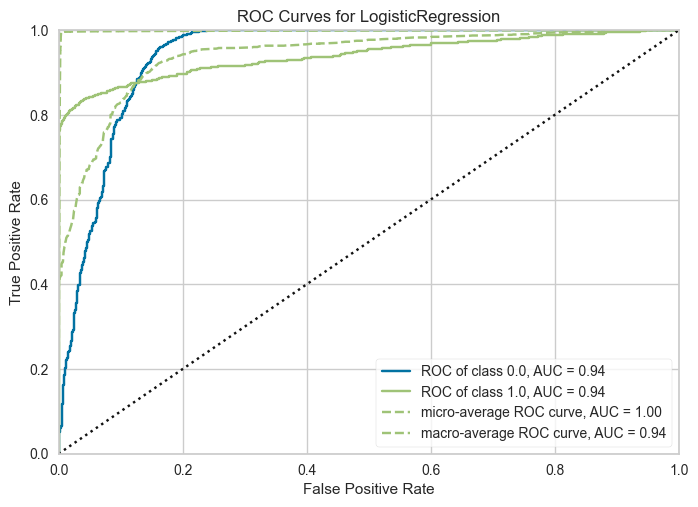

In [49]:
# plot the model
plot_model(tuned_lr, plot='auc')

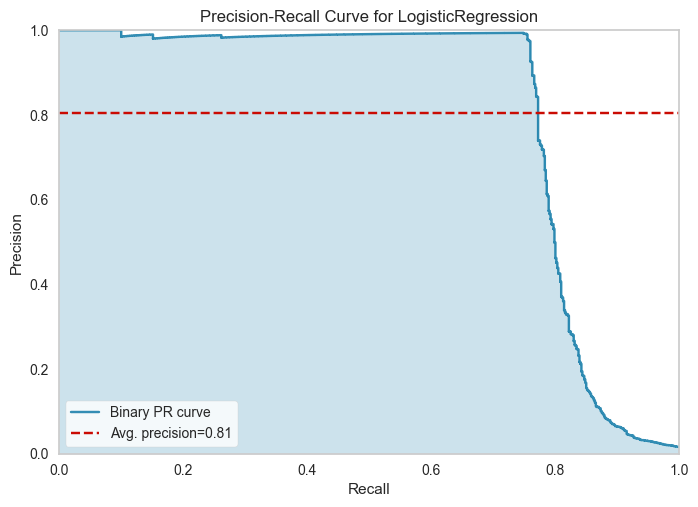

In [50]:
plot_model(tuned_lr, plot='pr')

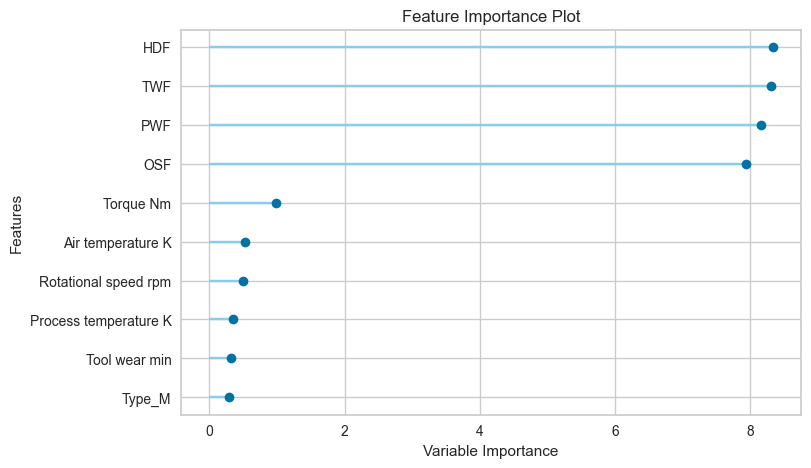

In [51]:
plot_model(tuned_lr, plot='feature')

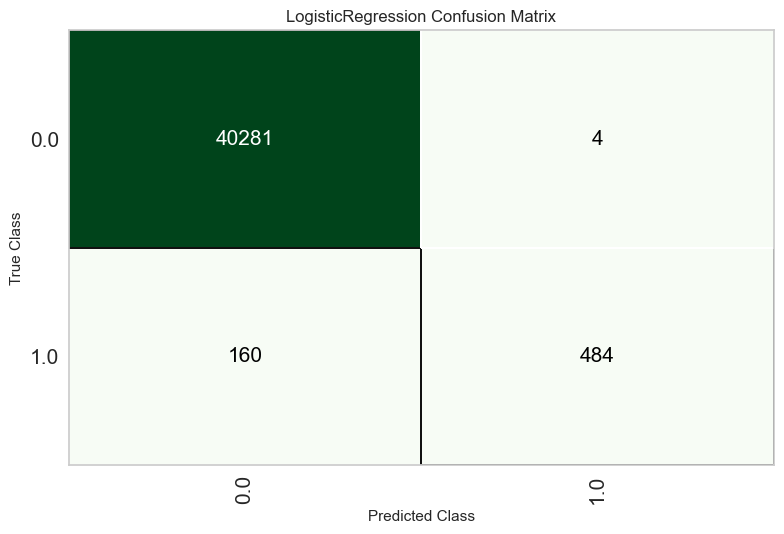

In [52]:
plot_model(tuned_lr, plot='confusion_matrix')

In [53]:
# evaluate model
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
# Predict
predict_model(tuned_lr)

Type_L  Type_M  Air temperature [K]  Process temperature [K]  \
37287       1       0            -0.033038                -0.245732   
20173       0       1            -1.054342                -0.101350   
16407       0       1             2.063323                 2.136567   
95771       0       0             0.504491                 0.331795   
40908       1       0            -0.839330                -1.039832   
...       ...     ...                  ...                      ...   
61882       1       0            -0.893083                -1.545168   
76446       1       0             0.450738                 0.403986   
51601       0       0             1.418289                 1.486849   
80675       1       0            -0.033038                 0.403986   
12809       1       0            -1.269353                -0.534496   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
37287                1.239596    -1.592730         0.839033    0    0    0   
20173               -0.426701     1.217985        -1.038101    0    0    0   
16407               -0.268690     0.253639         1.730672    0    0    0   
95771               -0.850457     1.500232         0.979819    0    0    0   
40908                0.873298    -0.957673         1.073675    0    0    0   
...                       ...          ...              ...  ...  ...  ...   
61882               -0.232778    -0.110931         1.026747    0    0    0   
76446               -0.951010     0.853415         0.322821    0    0    0   
51601                0.521365    -0.534302         1.449102    0    0    0   
80675                0.284348    -0.322616         0.307179    0    0    0   
12809                0.313078    -0.110931        -1.288386    0    0    0   

       OSF  RNF  Machine failure  prediction_label  prediction_score  
37287    0    0              0.0                 0            0.9983  
20173    0    0              0.0                 0            0.9973  
16407    0    0              0.0                 0            0.9936  
95771    0    0              0.0                 0            0.9857  
40908    0    0              0.0                 0            0.9976  
...    ...  ...              ...               ...               ...  
61882    0    0              0.0                 0            0.9963  
76446    0    0              0.0                 0            0.9944  
51601    0    0              0.0                 0            0.9953  
80675    0    0              0.0                 0            0.9975  
12809    0    0              0.0                 0            0.9987  

[40929 rows x 15 columns]

In [66]:
# predict model with test dataset
unseen_predictions = predict_model(tuned_lr, data= x_test)

In [67]:
unseen_predictions

Type_L  Type_M  Air temperature [K]  Process temperature [K]  \
131559       1       0             0.934513                 0.620558   
140573       1       0            -0.605343                -0.816888   
248138       0       1             1.048139                 0.051250   
247919       1       0            -0.025380                -0.379829   
56519        1       0            -0.140544                 0.548368   
...        ...     ...                  ...                      ...   
229699       0       1             1.115423                 0.063983   
41475        1       0            -0.839330                -1.328596   
62996        0       1             0.343232                 0.476177   
93375        1       0            -0.033038                 0.909322   
185249       0       1            -1.369885                -1.074559   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
131559               -0.333331     0.006673         0.385393    0    0    0   
140573               -1.183065     1.623368         1.359615    0    0    0   
248138               -1.635647     2.757760         1.208821    0    1    0   
247919               -1.796874     2.964497         1.375388    0    0    0   
56519                 0.507000    -0.063889         1.574244    0    0    0   
...                        ...          ...              ...  ...  ...  ...   
229699               -1.140376     2.707124         1.541446    0    1    0   
41475                 0.068879    -0.451980        -0.162105    0    0    0   
62996                 0.248437    -0.910632         1.198818    0    0    0   
93375                -0.311784    -0.040369         0.651320    0    0    0   
185249                1.113917    -1.059950         1.708348    1    0    0   

        OSF  RNF  prediction_label  prediction_score  
131559    0    0                 0            0.9960  
140573    1    0                 1            0.9736  
248138    0    0                 1            0.9941  
247919    1    0                 1            0.9918  
56519     0    0                 0            0.9952  
...     ...  ...               ...               ...  
229699    0    0                 1            0.9958  
41475     0    0                 0            0.9980  
62996     0    0                 0            0.9984  
93375     0    0                 0            0.9977  
185249    0    0                 1            0.8756  

[53713 rows x 14 columns]

In [59]:
#Evaluate the model result
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [78]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LR = classifier1.fit(x_train, y_train)
#prediction
y_pred = classifier1.predict(x_test)
#Accuracy
accuracy_LR = accuracy_score(y_test, y_pred)

In [79]:
#Predict result
y_pred_log_train = classifier1.predict(x_train)
y_pred_log_test = classifier1.predict(x_test)

In [80]:
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_log_test)

Confusion Matrix


array([[25983,   775],
       [ 5747, 21208]], dtype=int64)

In [81]:
print("classification_report")
print(classification_report(y_test, y_pred_log_test))

classification_report
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     26758
         1.0       0.96      0.79      0.87     26955

    accuracy                           0.88     53713
   macro avg       0.89      0.88      0.88     53713
weighted avg       0.89      0.88      0.88     53713



In [82]:
print("Training Accuracy", accuracy_score(y_train, y_pred_log_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_log_test))

Training Accuracy 0.8783703903671881
********************************************************************************
Test Accuracy 0.8785768808295943


In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators=500,criterion='entropy', bootstrap=True, oob_score=True, random_state=14)
RFE = classifier3.fit(x_train, y_train)
#prediction
y_pred3 = classifier3.predict(x_test)
#Accuracy
accuracy_RFE = accuracy_score(y_test,y_pred3)
print(accuracy_RFE)

0.9936700612514662


In [84]:
#Predict result
y_pred_RF_train = classifier3.predict(x_train)
y_pred_RF_test = classifier3.predict(x_test)

In [85]:
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_RF_test)

Confusion Matrix


array([[26604,   154],
       [  186, 26769]], dtype=int64)

In [86]:
print("classification_report")
print(classification_report(y_test, y_pred_RF_test))

classification_report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     26758
         1.0       0.99      0.99      0.99     26955

    accuracy                           0.99     53713
   macro avg       0.99      0.99      0.99     53713
weighted avg       0.99      0.99      0.99     53713



In [87]:
print("Training Accuracy", accuracy_score(y_train, y_pred_RF_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_RF_test))

Training Accuracy 0.9998976025022225
********************************************************************************
Test Accuracy 0.9936700612514662


In [ ]:
test_1 = test.drop(['Machine failure'], axis=1)

In [93]:
# Last part, we have to predict test data (whether customer will survived or not) where we don't have dv 
final_result =classifier3.predict(test_1)

In [95]:
final_report = pd.concat([test_1, pd.DataFrame(final_result)], axis=1)

In [96]:
final_report.head()

Type_L  Type_M  Air temperature [K]  Process temperature [K]  \
0       1       0             1.310783                 1.125895   
1       1       0             0.988266                 0.764940   
2       1       0             0.773255                 0.331795   
3       0       1             0.128221                -0.245732   
4       0       1             1.902064                 1.703422   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  \
0               -0.153773    -0.275575        -0.693960    0    0    0    0   
1                1.383242    -1.357524        -1.366600    0    0    0    0   
2                0.032967    -0.310856        -0.130819    0    0    0    0   
3               -0.297419     0.853415        -1.554313    0    0    0    0   
4               -0.038856     0.112515         0.150751    0    0    0    0   

   RNF    0  
0    0  0.0  
1    0  0.0  
2    0  0.0  
3    0  0.0  
4    0  0.0

In [97]:
final_report.rename(columns = {0: "Machine failure"}, inplace=True)

In [99]:
submission = final_report.copy()

In [100]:
submission.head()

Type_L  Type_M  Air temperature [K]  Process temperature [K]  \
0       1       0             1.310783                 1.125895   
1       1       0             0.988266                 0.764940   
2       1       0             0.773255                 0.331795   
3       0       1             0.128221                -0.245732   
4       0       1             1.902064                 1.703422   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  \
0               -0.153773    -0.275575        -0.693960    0    0    0    0   
1                1.383242    -1.357524        -1.366600    0    0    0    0   
2                0.032967    -0.310856        -0.130819    0    0    0    0   
3               -0.297419     0.853415        -1.554313    0    0    0    0   
4               -0.038856     0.112515         0.150751    0    0    0    0   

   RNF  Machine failure  
0    0              0.0  
1    0              0.0  
2    0              0.0  
3    0              0.0  
4    0              0.0

In [101]:
df_1 = pd.read_csv('test.csv')

In [103]:
df_1.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0  136429     L50896    L                302.3                    311.5   
1  136430     L53866    L                301.7                    311.0   
2  136431     L50498    L                301.3                    310.4   
3  136432     M21232    M                300.1                    309.6   
4  136433     M19751    M                303.4                    312.3   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  \
0                    1499         38.0               60    0    0    0    0   
1                    1713         28.8               17    0    0    0    0   
2                    1525         37.7               96    0    0    0    0   
3                    1479         47.6                5    0    0    0    0   
4                    1515         41.3              114    0    0    0    0   

   RNF  
0    0  
1    0  
2    0  
3    0  
4    0

In [106]:
data1=pd.DataFrame(df_1.id)

In [107]:
df_2 = submission['Machine failure']

In [108]:
submission=pd.concat([data1,df_2],axis=1)

In [109]:
submission.head()

id  Machine failure
0  136429              0.0
1  136430              0.0
2  136431              0.0
3  136432              0.0
4  136433              0.0

In [110]:
submission.to_csv('submission.csv',index=False)